In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Task 1

In [2]:
with open('text_corpus.txt', 'r') as f:
    text = f.read().lower()

# Tokenize and clean
tokens = re.findall(r'\b\w+\b', text)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words and not re.match(r'^\d+$', word)]

# Create mappings
vocab = sorted(set(tokens))
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}
vocab_size = len(vocab)

# Generate Skip-gram pairs
window_size = 2
skipgram_pairs = []
for i in range(len(tokens)):
    target = tokens[i]
    for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
        if j != i:
            context = tokens[j]
            skipgram_pairs.append((target, context))

# Convert pairs to indices
X_skipgram = torch.tensor([word2idx[pair[0]] for pair in skipgram_pairs])
Y_skipgram = torch.tensor([word2idx[pair[1]] for pair in skipgram_pairs])


In [3]:
text

'deep learning is amazing. machine learning is powerful. ai is the future. \ncomputers can learn from data. data is crucial for ai.'

In [4]:
tokens

['deep',
 'learning',
 'amazing',
 'machine',
 'learning',
 'powerful',
 'ai',
 'future',
 'computers',
 'learn',
 'data',
 'data',
 'crucial',
 'ai']

In [5]:
vocab

['ai',
 'amazing',
 'computers',
 'crucial',
 'data',
 'deep',
 'future',
 'learn',
 'learning',
 'machine',
 'powerful']

In [6]:
word2idx

{'ai': 0,
 'amazing': 1,
 'computers': 2,
 'crucial': 3,
 'data': 4,
 'deep': 5,
 'future': 6,
 'learn': 7,
 'learning': 8,
 'machine': 9,
 'powerful': 10}

In [7]:
idx2word

{0: 'ai',
 1: 'amazing',
 2: 'computers',
 3: 'crucial',
 4: 'data',
 5: 'deep',
 6: 'future',
 7: 'learn',
 8: 'learning',
 9: 'machine',
 10: 'powerful'}

In [8]:
skipgram_pairs

[('deep', 'learning'),
 ('deep', 'amazing'),
 ('learning', 'deep'),
 ('learning', 'amazing'),
 ('learning', 'machine'),
 ('amazing', 'deep'),
 ('amazing', 'learning'),
 ('amazing', 'machine'),
 ('amazing', 'learning'),
 ('machine', 'learning'),
 ('machine', 'amazing'),
 ('machine', 'learning'),
 ('machine', 'powerful'),
 ('learning', 'amazing'),
 ('learning', 'machine'),
 ('learning', 'powerful'),
 ('learning', 'ai'),
 ('powerful', 'machine'),
 ('powerful', 'learning'),
 ('powerful', 'ai'),
 ('powerful', 'future'),
 ('ai', 'learning'),
 ('ai', 'powerful'),
 ('ai', 'future'),
 ('ai', 'computers'),
 ('future', 'powerful'),
 ('future', 'ai'),
 ('future', 'computers'),
 ('future', 'learn'),
 ('computers', 'ai'),
 ('computers', 'future'),
 ('computers', 'learn'),
 ('computers', 'data'),
 ('learn', 'future'),
 ('learn', 'computers'),
 ('learn', 'data'),
 ('learn', 'data'),
 ('data', 'computers'),
 ('data', 'learn'),
 ('data', 'data'),
 ('data', 'crucial'),
 ('data', 'learn'),
 ('data', 'data

In [9]:
X_skipgram

tensor([ 5,  5,  8,  8,  8,  1,  1,  1,  1,  9,  9,  9,  9,  8,  8,  8,  8, 10,
        10, 10, 10,  0,  0,  0,  0,  6,  6,  6,  6,  2,  2,  2,  2,  7,  7,  7,
         7,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  0,  0])

In [10]:
Y_skipgram

tensor([ 8,  1,  5,  1,  9,  5,  8,  9,  8,  8,  1,  8, 10,  1,  9, 10,  0,  9,
         8,  0,  6,  8, 10,  6,  2, 10,  0,  2,  7,  0,  6,  7,  4,  6,  2,  4,
         4,  2,  7,  4,  3,  7,  4,  3,  0,  4,  4,  0,  4,  3])

#Task 2

In [11]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        x = self.embeddings(x)
        x = self.linear(x)
        return x

# Initialize model
embedding_dim = 100
model = SkipGram(vocab_size, embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


#Task 3

In [12]:
epochs = 5000
batch_size = 4

for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, len(X_skipgram), batch_size):
        x = X_skipgram[i:i+batch_size]
        y = Y_skipgram[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss/len(X_skipgram):.4f}")

# Save embeddings
embeddings_skipgram = model.embeddings.weight.data.numpy()


Epoch 0, Loss: 0.7437
Epoch 100, Loss: 0.3673
Epoch 200, Loss: 0.3647
Epoch 300, Loss: 0.3611
Epoch 400, Loss: 0.3595
Epoch 500, Loss: 0.3584
Epoch 600, Loss: 0.3576
Epoch 700, Loss: 0.3571
Epoch 800, Loss: 0.3566
Epoch 900, Loss: 0.3558
Epoch 1000, Loss: 0.3554
Epoch 1100, Loss: 0.3576
Epoch 1200, Loss: 0.3549
Epoch 1300, Loss: 0.3547
Epoch 1400, Loss: 0.3550
Epoch 1500, Loss: 0.3540
Epoch 1600, Loss: 0.3537
Epoch 1700, Loss: 0.3536
Epoch 1800, Loss: 0.3532
Epoch 1900, Loss: 0.3534
Epoch 2000, Loss: 0.3534
Epoch 2100, Loss: 0.3529
Epoch 2200, Loss: 0.3531
Epoch 2300, Loss: 0.3528
Epoch 2400, Loss: 0.3528
Epoch 2500, Loss: 0.3529
Epoch 2600, Loss: 0.3526
Epoch 2700, Loss: 0.3531
Epoch 2800, Loss: 0.3523
Epoch 2900, Loss: 0.3526
Epoch 3000, Loss: 0.3533
Epoch 3100, Loss: 0.3530
Epoch 3200, Loss: 0.3522
Epoch 3300, Loss: 0.3523
Epoch 3400, Loss: 0.3523
Epoch 3500, Loss: 0.3527
Epoch 3600, Loss: 0.3519
Epoch 3700, Loss: 0.3521
Epoch 3800, Loss: 0.3522
Epoch 3900, Loss: 0.3519
Epoch 4000, 

#Task 4

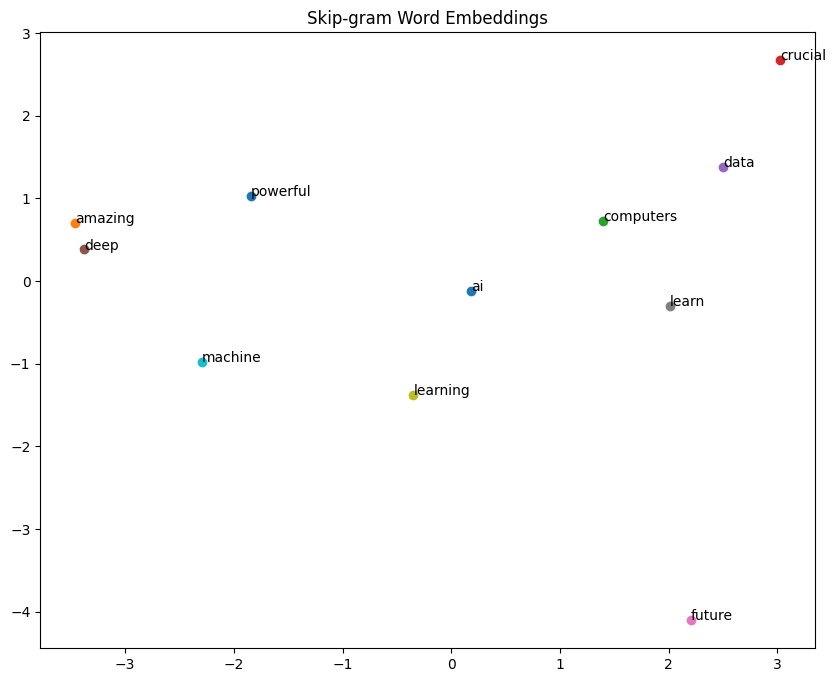

In [13]:
# PCA for 2D projection
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_skipgram)

# Plot
plt.figure(figsize=(10, 8))
for i, word in enumerate(vocab):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("Skip-gram Word Embeddings")
plt.show()

#Task 5

In [14]:
# Generate CBOW pairs
def generate_cbow_pairs(tokens, window_size=2):
    pairs = []
    for i in range(len(tokens)):
        target = tokens[i]
        context = [
            tokens[j]
            for j in range(i - window_size, i + window_size + 1)
            if j != i and 0 <= j < len(tokens)
        ]
        pairs.append((context, target))
    return pairs

cbow_pairs = generate_cbow_pairs(tokens)

# Pad sequences
max_context_len = 2 * window_size
X_cbow = []
Y_cbow = []
for context, target in cbow_pairs:
    context_indices = [word2idx[word] for word in context] + [0] * (max_context_len - len(context))
    X_cbow.append(context_indices)
    Y_cbow.append(word2idx[target])

X_cbow = torch.tensor(X_cbow)
Y_cbow = torch.tensor(Y_cbow)

# CBOW Model
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        x = self.embeddings(x).mean(dim=1)
        x = self.linear(x)
        return x

# Train CBOW
cbow_model = CBOW(vocab_size, embedding_dim)
optimizer = optim.Adam(cbow_model.parameters(), lr=0.01)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = cbow_model(X_cbow)
    loss = criterion(outputs, Y_cbow)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"CBOW Epoch {epoch}, Loss: {loss.item():.4f}")

# Analogy function
def analogy(a, b, c, embeddings, word2idx, idx2word):
    try:
        vec = embeddings[word2idx[a]] - embeddings[word2idx[b]] + embeddings[word2idx[c]]
        distances = np.dot(embeddings, vec)
        closest_idx = np.argmax(distances)
        return idx2word[closest_idx]
    except KeyError:
        return "Word not in vocabulary"

# Test analogy (example with existing words)
result = analogy("learning", "deep", "machine", cbow_model.embeddings.weight.data.numpy(), word2idx, idx2word)
print(f"'learning - deep + machine' = {result}")


CBOW Epoch 0, Loss: 2.5062
CBOW Epoch 100, Loss: 0.0046
CBOW Epoch 200, Loss: 0.0019
CBOW Epoch 300, Loss: 0.0010
CBOW Epoch 400, Loss: 0.0006
CBOW Epoch 500, Loss: 0.0004
CBOW Epoch 600, Loss: 0.0003
CBOW Epoch 700, Loss: 0.0002
CBOW Epoch 800, Loss: 0.0002
CBOW Epoch 900, Loss: 0.0002
CBOW Epoch 1000, Loss: 0.0001
CBOW Epoch 1100, Loss: 0.0001
CBOW Epoch 1200, Loss: 0.0001
CBOW Epoch 1300, Loss: 0.0001
CBOW Epoch 1400, Loss: 0.0001
CBOW Epoch 1500, Loss: 0.0001
CBOW Epoch 1600, Loss: 0.0001
CBOW Epoch 1700, Loss: 0.0000
CBOW Epoch 1800, Loss: 0.0000
CBOW Epoch 1900, Loss: 0.0000
CBOW Epoch 2000, Loss: 0.0000
CBOW Epoch 2100, Loss: 0.0000
CBOW Epoch 2200, Loss: 0.0000
CBOW Epoch 2300, Loss: 0.0000
CBOW Epoch 2400, Loss: 0.0000
CBOW Epoch 2500, Loss: 0.0000
CBOW Epoch 2600, Loss: 0.0000
CBOW Epoch 2700, Loss: 0.0000
CBOW Epoch 2800, Loss: 0.0000
CBOW Epoch 2900, Loss: 0.0000
CBOW Epoch 3000, Loss: 0.0000
CBOW Epoch 3100, Loss: 0.0000
CBOW Epoch 3200, Loss: 0.0000
CBOW Epoch 3300, Loss: